<a href="https://colab.research.google.com/github/VadushaLyapushin/rzhavchina/blob/main/_c_2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/VadushaLyapushin/rzhavchina.git

Cloning into 'rzhavchina'...
remote: Enumerating objects: 925, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 925 (delta 0), reused 3 (delta 0), pack-reused 918
Receiving objects: 100% (925/925), 127.51 MiB | 33.52 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import SGD

from skimage import exposure
from skimage import transform
from skimage import io

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from imutils import paths
import os
import matplotlib.pyplot as plt
import csv
import cv2
import numpy as np
import pickle
import random



In [ ]:
ImagePathsWithoot = list(paths.list_images("/content/rzhavchina/Add images/without"))
random.seed(4)
print(len(ImagePathsWithoot))
ImagePathsSurface = list(paths.list_images("/content/rzhavchina/Add images/surface"))
random.seed(4)
print(len(ImagePathsSurface))
ImagePathsDeep = list(paths.list_images("/content/rzhavchina/Add images/deep"))
random.seed(4)
print(len(ImagePathsDeep))

227
178
243


In [ ]:
ImagePaths = ImagePathsWithoot + ImagePathsDeep

random.shuffle(ImagePaths)
print(len(ImagePaths))

470


In [ ]:
data = []
labels = []

i=0
for imagepath in ImagePaths:
  image = cv2.imread(imagepath)
  image = cv2.resize(image, (512, 512))
  data.append(image)
  label = imagepath.split(os.path.sep)[-2]
  if label == "without":
      label = [1, 0]
  elif label == "deep":
      label = [0, 1]
  # if label == "without":
  #   label = [1, 0, 0]
  # elif label == "surface":
  #   label = [0, 1, 0]
  # elif label == "deep":
  #   label = [0, 0, 1]
  labels.append(label)
print(labels)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

with open("/content/rzhavchina/training/data.pickle", 'wb') as f:
  pickle.dump(data, f)
print("Data seved")

with open("/content/rzhavchina/training/labels.pickle", 'wb') as f:
  pickle.dump(labels, f)
print("Labels seved")


[[0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0],

In [ ]:
np.prod(labels.shape)

940

In [ ]:
with open("/content/rzhavchina/training/data.pickle", 'rb') as f:
  data = pickle.load(f)
print("Data loaded")

with open("/content/rzhavchina/training/labels.pickle", 'rb') as f:
  labels = pickle.load(f)
print("Labels loaded")

(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                  test_size=0.15,
                                                  random_state=4)

print("Dataset prepared")

Data loaded
Labels loaded
Dataset prepared


In [ ]:
model = Sequential()
inputShape = (512, 512, 3)
chanDim = -1
    # CONV => RELU => BN => POOL
model.add(Conv2D(8, (5, 5), padding="same",
  input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
  # first set of (CONV => RELU => CONV => RELU) * 2 => POOL
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
# second set of (CONV => RELU => CONV => RELU) * 2 => POOL
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
  # first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# second set of FC => RELU layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# softmax classifier
model.add(Dense(2))
model.add(Activation("softmax"))
# return the constructed network architecture
print ("End")

End


In [ ]:
# with open("/content/rzhavchina/training/data.pickle", 'rb') as f:
#   data = pickle.load(f)
# print("Data loaded")

# with open("/content/rzhavchina/training/labels.pickle", 'rb') as f:
#   labels = pickle.load(f)
# print("Labels loaded")

# (trainX, testX, trainY, testY) = train_test_split(data, labels,
#                                                   test_size=0.15,
#                                                   random_state=42)

# print("Dataset prepared")


# classTotals = trainY.sum(axis=0)
# classWeight = classTotals.max() / classTotals
# print(type(classWeight))

classTotals = trainY.sum(axis=0)
print(classTotals)
classWeight = classTotals.max() / classTotals
print(classWeight/1)

TestclassTotals = testY.sum(axis=0)
TestclassWeight = TestclassTotals.max() / TestclassTotals
print(TestclassTotals)
print("TestclassWeight")
print(TestclassWeight//1)
f=TestclassTotals.argmin()



# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 30
INIT_LR = 1e-3
BS = 32
# load the label names
target_names= ["without", "deep"]
numLabels = len(target_names)

# construct the image generator for data augmentation
opt = 'adam'
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# opt = keras.optimizers.legacy.Adam(lr=INIT_LR, decay=INIT_LR / (NUM_EPOCHS * 0.5))

# opt = tf.keras.optimizers.legacy.Adam(
#     learning_rate=INIT_LR,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     amsgrad=False,
#     name='Adam',
#     **kwargs)


model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
model.summary()


[191 208]
[1.08900524 1.        ]
[36 35]
TestclassWeight
[1. 1.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 8)       608       
                                                                 
 activation (Activation)     (None, 512, 512, 8)       0         
                                                                 
 batch_normalization (Batch  (None, 512, 512, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      1168      
                                                        

In [ ]:
aug = ImageDataGenerator(
	rotation_range=5,
	zoom_range=0.05,
	width_shift_range=0.05,
	height_shift_range=0.05,
	shear_range=0.10,
	horizontal_flip=False,
	vertical_flip=False,
	fill_mode="nearest")

# train the network
print("[INFO] training network...")
print(classWeight)

class_Weight = {0: 1.,
                1: 1.}


checkpointer = ModelCheckpoint(filepath='/content/rzhavchina/training/Best_Sign_Class.h5', verbose=1, save_best_only=True)

H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
												validation_data=(testX, testY),
												steps_per_epoch=trainX.shape[0] // BS,
												epochs=NUM_EPOCHS,
                        shuffle=True,
                        class_weight=class_Weight,
                        callbacks=[checkpointer])


[INFO] training network...
[1.08900524 1.        ]


<ipython-input-16-0dd0b7df059c>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),


Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 0.5496 - accuracy: 0.8147 
Epoch 1: val_loss improved from inf to 1.95785, saving model to /content/rzhavchina/training/Best_Sign_Class.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 186s 15s/step - loss: 0.5496 - accuracy: 0.8147 - val_loss: 1.9579 - val_accuracy: 0.5070
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.8992 
Epoch 2: val_loss did not improve from 1.95785
12/12 [==============================] - 175s 14s/step - loss: 0.2699 - accuracy: 0.8992 - val_loss: 2.2648 - val_accuracy: 0.5070
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.1907 - accuracy: 0.9319 
Epoch 3: val_loss did not improve from 1.95785
12/12 [==============================] - 176s 14s/step - loss: 0.1907 - accuracy: 0.9319 - val_loss: 2.8038 - val_accuracy: 0.5070
Epoch 4/30
12/12 [==============================] - ETA: 0s - loss: 0.1947 - accuracy: 0.9264 
Epoch 4: val_loss did not improve from 1.95785
12/12 [==============================] - 177s 14s/step - loss: 0.1947 - accuracy: 0.9264 - val_loss: 2.8025 - val_accuracy: 0.5070
Epoch 5/30
12/12 [==============================] 

In [ ]:
predictions = model.predict (testX, batch_size = 32)
# print(predictions)

print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=("without","deep")))


3/3 [==============================] - 9s 3s/step
              precision    recall  f1-score   support

     without       0.77      1.00      0.87        36
        deep       1.00      0.69      0.81        35

    accuracy                           0.85        71
   macro avg       0.88      0.84      0.84        71
weighted avg       0.88      0.85      0.84        71



End


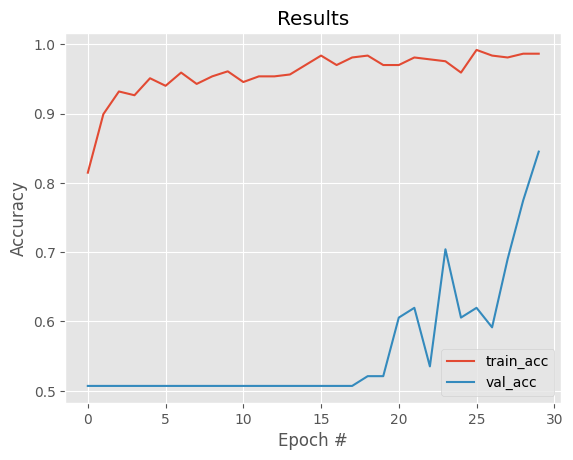

In [ ]:
N = np.arange(0, NUM_EPOCHS)
plt.style.use("ggplot")
plt.figure()
# plt.plot(N, H.history["loss"], label="train_loss")
# plt.plot(N, H.history["val_loss"], label="vall_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Results")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("/content/rzhavchina/training/Loss.png")

print("End")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from keras.models import load_model
from imutils import paths
from google.colab.patches import cv2_imshow
import numpy as np
import cv2


In [ ]:
model = load_model("/content/drive/MyDrive/training/Best_Sign_Class.h5")

In [ ]:
ImagePaths = list(paths.list_images("/content/rzhavchina/Add images/test"))